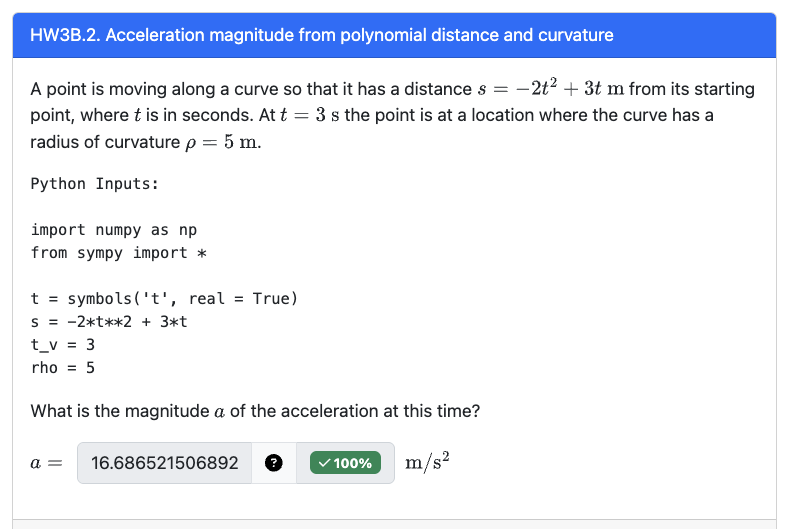

$v=\frac{ds}{dt}$  

$a_T=\frac{dv}{dt}$

$a_N=\frac{v^2}{r}$

In [ ]:
# 3B.2
# 思路 
# v=ds/dt算出来切向速度
# aN=v**2/r算出来径向加速度
# aT=dv/dt算出来切向加速度

import numpy as np
from sympy import *

t = symbols('t', real = True)
s = -3*t**2 + 2*t - 2
t_v = 2
rho = 7

######################


v=diff(s,t,1)
at=diff(s,t,2)
an=v**2/rho

a=(at**2+an**2)**0.5
print(a.subs(t,t_v))


15.4945678433786


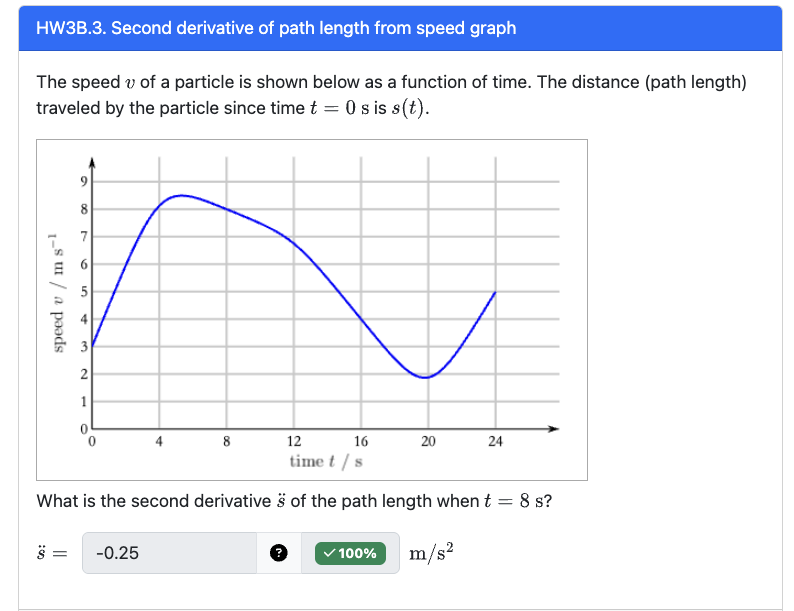

In [ ]:
# 3B.3
# 思路
# s``=at 切向加速度

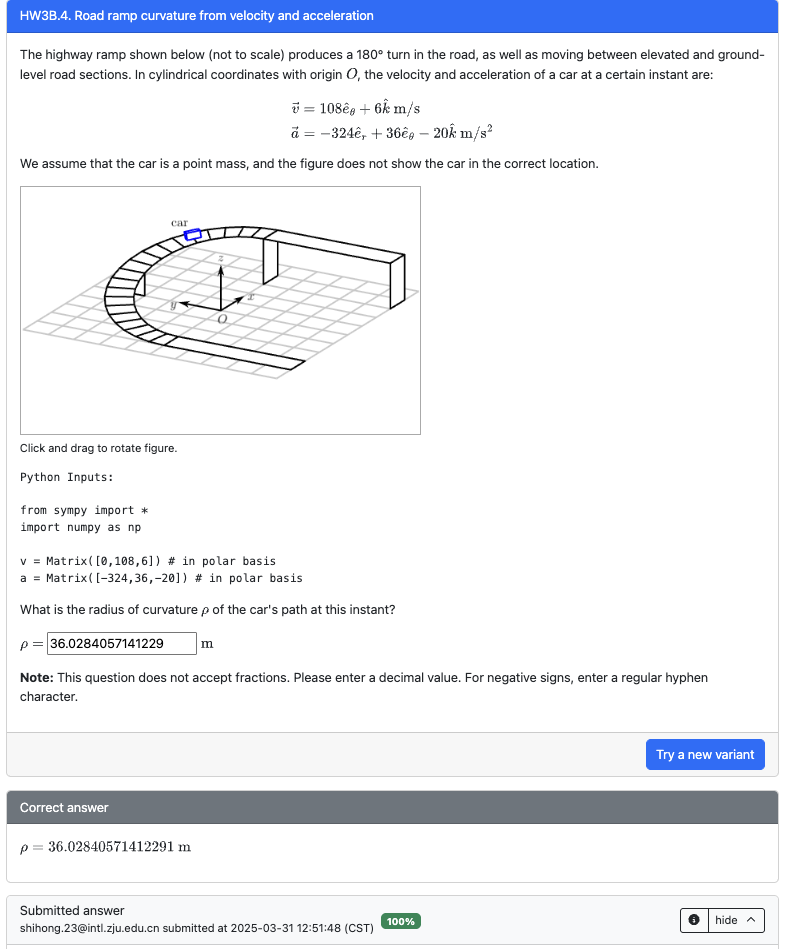

In [ ]:
# 3B.4
# 思路
# k=|a x v|/|v|**3
# r=1/k

from sympy import *
import numpy as np

v = Matrix([0,44,5]) # in polar basis
a = Matrix([-44,44,-10]) # in polar basis
###################################

k=a.cross(v).norm()/v.norm()**3
r=1/k
print(r.evalf())

42.2122629899867


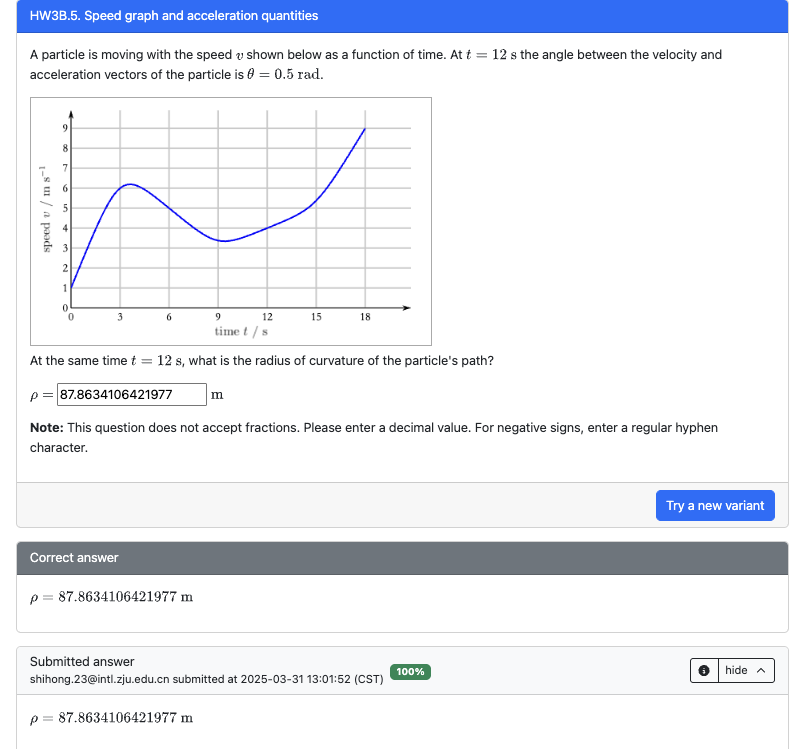

In [ ]:
# 3B.5
# 一共三种题型，给a,r,theta中的一个求另一个
# aN=(a**2-at**2)**(0.5)
# aN=v**2/r
# a*sin(theta)=an 
# a*cos(theta)=at


# 读图得两个
v=5
at=1/2  #看斜率求出切向加速度
# 题目会给出a,r,theta其中一个
# a=15
r=18
# theta=0.5 
###################################

#给加速度算半径 a->r
an1=sqrt(a**2-at**2) #计算径向加速度
r1=v**2/an1          #计算半径an=v**2/r

#给半径算加速度 r->a
an2=v**2/r           #计算径向加速度
a2=sqrt(an2**2+at**2)

#给夹角算半径 theta->r
a=at/cos(theta)
an3=abs(a*sin(theta))#这里有绝对值
r3=v**2/an3

print(' a→r',r1)
print(' r→a',a2)
print(' ∠→r',r3.evalf())

 a→r 91.5243860856226
 r→a 1.47614780617627
 ∠→r 91.5243860856226


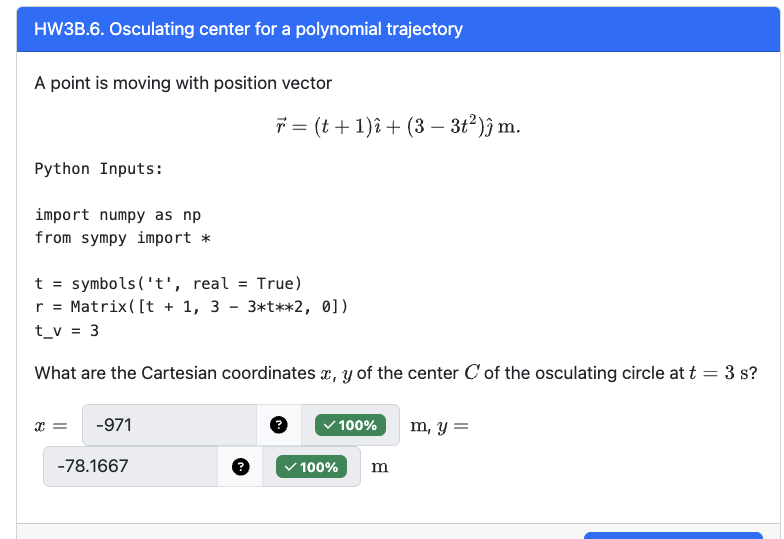

$x_0=x-\frac{y'[1+y'^2]}{y''}$  
$y_0=y+\frac{[1+y'^2]}{y''}$

这里都是y对x求导

In [ ]:
# 3B.6
# 这个题我有三个解法，最简单的是第三个，直接用上面的公式计算圆心
# 第二个是用en r计算
# 第一个是用直角坐标系直接计算,现在还有点问题 我还在修改

# import numpy as np
# from sympy import *

# t = symbols('t', real = True)
# r = Matrix([2*t**2 - 2, -2*t**2 - t - 2, 0])
# t_v = 2

# v=diff(r,t,1)
# a=diff(r,t,2)

# r=r.subs(t,t_v)
# v=v.subs(t,t_v)
# a=a.subs(t,t_v)

# k=a.cross(v).norm()/v.norm()**3
# rou=1/k
# # print(rou.evalf())
# # print(r.evalf())
# # print(v.evalf())
# # print(a.evalf())

# theta=atan(v[1]/v[0])
# theta==theta-90
# # theta==theta+90

# x0=r[0]+rou*cos(theta)
# y0=r[1]+rou*sin(theta)
# print(x0,y0)


In [57]:
# 3B.6
t = symbols('t', real = True)
r = Matrix([2*t**2 + t, 2*t, 0])
t_v = 2
######################


def MO(x):
    return (x[0]**2+x[1]**2+x[2]**2)**0.5

#计算曲率半径
v=diff(r,t,1).subs(t,t_v)
a=diff(r,t,2).subs(t,t_v)
radius=(MO(a.cross(v))/MO(v)**3)**-1

#计算en方向
T=diff(r,t,1)/MO(diff(r,t,1))
N=diff(T,t,1)/MO(diff(T,t,1))


N=N.subs(t,t_v)
(r.subs(t,t_v)+N*radius).T

Matrix([[31.25, -91.625, 0]])

In [58]:
# 3B.6
t = symbols('t', real = True)
r = Matrix([t + 1, 3 - 3*t**2, 0])
t_v = 3
######################计算过程

x=r[0]
y=r[1]

x0=x.subs(t,t_v)
y0=y.subs(t,t_v)
y1=diff(y,t)/diff(x,t) #参数方程求导：dy/dx=dy/dt*dt/dx
y2=diff(y1,t)/diff(x,t) #二阶导: d/dt(dy/dx)*dt/dx

# print(sqrt(119**2+42.5**2))
xc=float((x0-y1*(1+y1**2)/y2).subs(t,t_v)) 
yc=float((y0+(1+y1**2)/y2).subs(t,t_v))
xc,yc

(-971.0, -78.16666666666667)

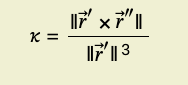
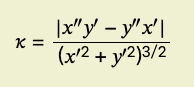
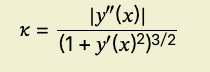

In [76]:
# 3B.7
# 


# 思路
# r通过上面的第三个公式计算
# an at值好求，at_mag=dv/dt=d2r/dt2算出来切向加速度，an_mag=v**2/r算出来径向加速度  这步之后得到a=..et+..en
# an at先设置初值方向，at好定义，就是简单的dy/dx的方向，可以直接选择定义为dy/dx,那么加速度的方向来找at的方向，如果加速度为正，那么是an就是at逆时针90度，如果加速度为负，an就是at顺时针旋转90度（其实这步就是转et en为i j坐标） 这步之后得到a=..i+..j
# ax,ay->Fx,Fy

import numpy as np
from sympy import *



# 这里需要自己填写
#跟运动方向有关，左=-1，右=1   ！！！！！！！！！！！ 
# d1=int(input('moving_derection='))
d1=1
# d1=-1
#跟加速方向有关，减速=-，加速=+！！！！！！！！！！！
# d2=int(input('acceleration_direction='))
d2=1
# d2=-1

x = symbols('x')
####################复制部分
m = 5
y = 2*sin(x)
g = -9.8
x_v = 6
vMag = 2
vDotMag = 5


v=vMag
at_mag=d1*vDotMag  
a
direction=d2 
####################


#计算速度方向nv,nan,nat
k=diff(y,x,1).subs(x,x_v) #一阶导确定 vy/vx 的值，此值与运动方向无关

#二阶导判断 an 方向是 at逆时针转还是顺时针转 ,此值与运动方向无关
d=diff(y,x,2).subs(x,x_v) 

#判断旋转方向
if d>0:
    d=1
if d<0:
    d=-1
#如果是向左运动的话theta要+180°

turn=0
if direction<0:
    turn = pi

#计算an,at的单位向量
theta=float(atan(k))+turn
atn=np.array([cos(theta),sin(theta)])
ann=np.array([cos(theta+d*pi/2),sin(theta+d*pi/2)])
print(ann)


#计算at向量
at=at_Mag*atn
    
#计算an向量
y1=float(diff(y,x,1).subs(x,x_v))
y2=float(diff(y,x,2).subs(x,x_v))
r=(1+y1**2)**(1.5)/abs(y2) #抄过来的计算公式，目前还没有弄明白
print(r)


an_Mag=v**2/r
an=an_Mag*ann


#计算和向量
a=an+at

#计算Fx,Fy
fx=a[0]*m
fy=(a[1]-g)*m

print('i',fx)
print('j',fy)

[-0.886947647159525 0.461869972176350]
18.161860214058944
i 10.5700347644819
j 71.6823064493764


In [132]:
# 3B.7-11 这是一个题和其步骤解析

# 思路
# r通过上面的第三个公式计算
# an at值好求，at_mag=dv/dt=d2r/dt2算出来切向加速度，an_mag=v**2/r算出来径向加速度  这步之后得到a=..et+..en
# an at先设置初值方向，at好定义，就是简单的dy/dx的方向，可以直接选择定义为dy/dx,那么加速度的方向来找at的方向，如果加速度为正，那么是an就是at逆时针90度，如果加速度为负，an就是at顺时针旋转90度（其实这步就是转et en为i j坐标） 这步之后得到a=..i+..j
# ax,ay->Fx,Fy


# 我现在又一个问题 就是上面的向左移动和向右移动 包括v是增加还是减少为什么不影响
# # 这里好像不需要根据题干文字 输入
# # moving to the left/right -1/1
# d1=-1
# d1=1
# # which is decreasing/increasing -1/1
# d2=-1
# d2=1

m = 9
y = -2*cos(2*x)
g = -9.8
x_v = 8
vMag = 3
vDotMag = 2
#==============

v=vMag

# 计算r
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=1/(y2/(1+y1**2)**(3/2))
print(r.evalf())
# 计算值 at_mag,an_mag
an_mag=-v**2/r
at_mag=vDotMag

# 计算向量 at_n,an_n ,先判断旋转方向
d=diff(y,x,2).subs(x,x_v) 
if d>0:
    d=1
if d<0:
    d=-1
print(d)

theta=atan(y1)
at_n=Matrix([cos(theta),sin(theta),0])
an_n=Matrix([cos(theta+d*pi/2),sin(theta+d*pi/2),0])

print(at_mag,an_mag.evalf())
at=at_mag*at_n
an=an_mag*an_n
a=an+at

print(a.evalf())


fx=a[0]*m
fy=(a[1]-g)*m

print('fx',fx.evalf())
print('fy',fy.evalf())



-0.463098261722653
-1
2 19.4343204107945
Matrix([[-13.3627834092394], [-14.2523271568955], [0]])
fx -120.265050683155
fy -40.0709444120591


In [ ]:
# 3B.8
m = 8
y = 4*cos(x)
g = -9.8
x_v = 7
vMag = 3
vDot = 1
# ===========
v=vMag 
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=1/(y2/(1+y1**2)**(3/2))
print('rou要自己变成正的',r.evalf())
print("s`",vMag)
print("s``很奇怪，但是就是正的，不论是增速还是减速",vDot)

rou要自己变成正的 -7.37171620138995
s` 3
s``很奇怪，但是就是正的，不论是增速还是减速 1


In [ ]:
# 3B.9

import numpy as np
from sympy import *

x = symbols('x', real = True)

m = 5
y = -3*cos(2*x)
g = -9.8
x_v = 7
vMag = 1
vDot = 5
# 

d1=1
d2=-1
# ==============



v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=1/(y2/(1+y1**2)**(3/2))

at_mag=d2*vDot
an_mag=d1*v**2/r


print("et",at_mag)
print("en",an_mag.evalf())

# right decreasing 
# -et -en



et -5
en 0.00749420171548027


In [213]:
# 3B.10

import numpy as np
from sympy import *

x = symbols('x', real = True)


m = 9
y = 3*sin(2*x)
g = -9.8
x_v = 12
vMag = 4
vDot = 3

# 

d1=-1
d2=1
# ==========
v=vMag

# 计算r
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=1/(y2/(1+y1**2)**(3/2))
print(r.evalf())



d=1

# 计算值 at_mag,an_mag
at_mag=d2*vDot
an_mag=v**2/r

theta=atan(y1)
at_n=d1*Matrix([cos(theta),sin(theta),0])
an_n=Matrix([cos(theta+d*pi/2),sin(theta+d*pi/2),0])

print('at_n',at_n.evalf())
print('an_n',an_n.evalf())


# right decreasing d=-1
# right decreasing d=-1




1.88156316403980
at_n Matrix([[-0.365699728828563], [-0.930732887747454], [0]])
an_n Matrix([[-0.930732887747454], [0.365699728828563], [0]])


In [ ]:
# 3B.11
import numpy as np
from sympy import *

x = symbols('x', real = True)



m = 7
y = 2*cos(3*x)
g = -9.8
x_v = 12
vMag = 2
vDot = 4


d1=


v=vMag

# 计算r
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=1/(y2/(1+y1**2)**(3/2))
print(r.evalf())
# 计算值 at_mag,an_mag

at_mag=vDot
an_mag=-v**2/r

# 计算向量 at_n,an_n ,先判断旋转方向
d=diff(y,x,2).subs(x,x_v) 

if d>0:
    d=-1
else:
    d=1
print(d)
d=1
theta=atan(y1)
at_n=Matrix([cos(theta),sin(theta),0])
an_n=Matrix([cos(theta+d*pi/2),sin(theta+d*pi/2),0])

print(at_mag,an_mag.evalf())


at=at_mag*at_n
an=an_mag*an_n
a=an+at

print(a.evalf())



# right increasing 上面的d正负变换一下
# left increasing  d反的，然后总体正负变换 d=1 a=-




95.3851780758887
-1
4 -0.0419352364873460
Matrix([[0.704253204418058], [3.93773868967027], [0]])
